## Data Preprocessing
    - 영상 데이터 전처리

In [2]:
# 정형 데이터 전처리
import seaborn as sns
import pandas as pd

## 환경구성

#### 설치 라이브러리
```python
!pip install opencv-python
```

In [3]:
import os
import matplotlib.pyplot as plt

# !pip install  opencv-python
import cv2

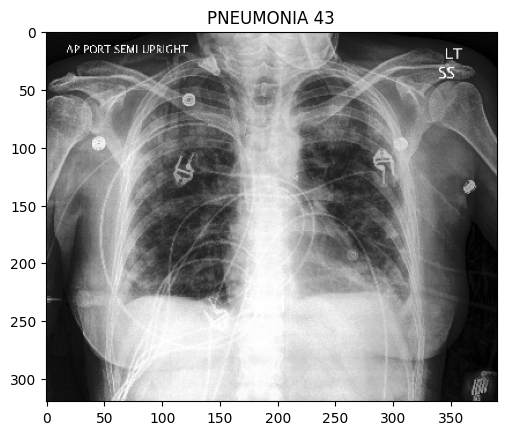

In [4]:
# data 경로 설정
data_dir = './datas/Pneumonia/Positive/'
categories = ['train','test','val']  # 전처리된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 7:2:1 or 8:1:1

# 샘플 이미지 시각화
img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir, img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # 색감만 사라짐(미리처리)

plt.imshow(img, cmap='gray')
plt.title(f'PNEUMONIA 43')
plt.show()